#### KNN classification 


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading data 
data = pd.read_csv("C:/Users/dhwan/Desktop/CourseraCourses/Classification/Classification_Algorithm_Machine_Learning/data_cleaned.csv")
data.shape
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


#### DataSet 
We are trying to predict whether the person will survive or not based on various factors in the dataset of titanic.


In [3]:
#segregating independent and dependent variables 
x = data.drop(['Survived'], axis = 1)
y = data["Survived"]
x.shape, y.shape

((891, 24), (891,))

In [4]:
#Scaling the data using minmax scalar
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
x_scaled = scalar.fit_transform(x)

In [5]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [6]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
#importing the train test split function
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = 56, stratify = y)

In [8]:
#implementing KNN classifier 
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score
clf = KNN(n_neighbors = 5)
clf.fit(train_x, train_y)
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('F1 score is :', k)

F1 score is : 0.6785714285714285


#### Elbow of Classifier

In [9]:
def Elbow(K):
    #we create an empty list for storing the value of error for value of each k
    test_error = []
    for i in K:
        #for each value of k we create an instance of KNN
        clf = KNN(n_neighbors = i )
        #we train the model
        clf.fit(train_x, train_y)
        #make prediction on test dataset
        tmp = clf.predict(test_x)
        #calculate f1 score
        tmp = f1_score(tmp, test_y)
        error = 1- tmp
        test_error.append(error)
    return test_error

In [19]:
k = range(6,20,2)

In [20]:
test = Elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

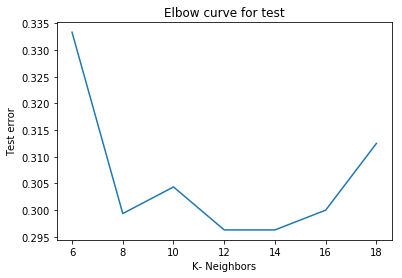

In [21]:
#plotting
plt.plot(k,test)
plt.xlabel('K- Neighbors')
plt.ylabel('Test error')
plt.title('Elbow curve for test')

In [13]:
#we see that from the plot the minumum error occurs at the value of k = 12 so we check the f1 score at 12
clf = KNN(n_neighbors = 12)
clf.fit(train_x, train_y)
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print("Test f1 score ", k)
#from the score we see an improvement 0.703 is the new one compared to 0.67 that we found previously with k = 5

Test f1 score  0.7037037037037037


#### KNN Regression

In [14]:
dataregression = pd.read_csv("C:/Users/dhwan/Desktop/CourseraCourses/Classification/Classification_Algorithm_Machine_Learning/train_cleaned.csv")
dataregression


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,10.395,0.000000,51.4008,2009,556.6088,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
6,13.650,0.012741,57.6588,1987,343.5528,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
7,0.000,0.127470,107.7622,1985,4022.7636,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,16.200,0.016687,96.9726,2002,1076.5986,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
9,19.200,0.094450,187.8214,2007,4710.5350,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [22]:
#segregating independent and dependent variables 
p = dataregression.drop(['Item_Outlet_Sales'], axis = 1)
q = dataregression['Item_Outlet_Sales']
p.shape, q.shape

((8523, 45), (8523,))

In [23]:
#Scaling the data using minmax scalar
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
p_scaled = scalar.fit_transform(p)

In [24]:
p = pd.DataFrame(p_scaled)

In [25]:
#importing the train test split function
from sklearn.model_selection import train_test_split
train_p, test_p, train_q, test_q = train_test_split(p,q, random_state = 56)

#### Implementing KNN Regressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse


In [28]:
#creating an instance
regression = KNN(n_neighbors = 5)
#fitting the model
regression.fit(train_p,train_q)
#predicting train test set 
test_predict = regression.predict(test_p)
k = mse(test_predict, test_q)
print('Test MSE', k)

Test MSE 1714854.6015010108


In [29]:
#following the same format as the classifier, we create the elbow function. 
def ElbowReg(K):
    #we create an empty list for storing the value of error for value of each k
    test_mse = []
    for i in K:
        #for each value of k we create an instance of KNN
        reg = KNN(n_neighbors = i )
        #we train the model
        reg.fit(train_x, train_y)
        #make prediction on test dataset
        tmp = reg.predict(test_x)
        #calculate f1 score
        tmp = mse(tmp, test_y)
        test_mse.append(tmp)
    return test_mse


In [30]:
k = range(1,40)

In [31]:
test = ElbowReg(k)

Text(0.5, 1.0, 'Elbow curve for test')

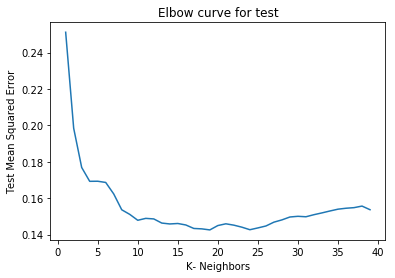

In [33]:
#plotting
plt.plot(k,test)
plt.xlabel('K- Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow curve for test')

In [39]:
reg = KNN(n_neighbors = 24)
reg.fit(train_x, train_y)
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE', k)

Test MSE 0.14271144743398104


In [ ]:
# MSE is improved based on the value of k with a lower error score
#It has reduced 
